### Seu primeiro projeto de aprendizado de máquina em Python passo a passo

Você precisa ver como todas as peças de um projeto de aprendizado de máquina de modelagem preditiva realmente
t juntos. Nesta lição, você concluirá seu primeiro projeto de aprendizado de máquina usando Python.
Neste projeto de tutorial passo a passo, você irá:

. Baixe e instale o Python SciPy e obtenha o pacote mais útil para aprendizado de máquina
em Python.
. Carregue um conjunto de dados e entenda sua estrutura usando resumos estatísticos e visualização de dados
ização.
. Crie 6 modelos de aprendizado de máquina, escolha o melhor e conquiste a confiança de que a precisão é
confiável.

Se você é um iniciante em aprendizado de máquina e quer finalmente começar a usar o Python, este
tutorial foi projetado para você. Vamos começar!

#### O Hello World do aprendizado de máquina

O melhor pequeno projeto para começar em uma nova ferramenta é a classificação da íris
flores. Isto é um
bom conjunto de dados para seu primeiro projeto porque é muito bem compreendido.

. Os atributos são numéricos, então você tem que descobrir como carregar e manipular os dados.
. É um problema de classificação, permitindo que você pratique com um tipo mais fácil de supervisão
algoritmo de aprendizagem.
. É um problema de classificação multiclasse (multi-nominal) que pode requerer alguns
manuseio.
. Tem apenas 4 atributos e 150 linhas, o que significa que é pequeno e cabe facilmente na memória (e
uma tela ou uma única folha de papel).
. Todos os atributos numéricos estão nas mesmas unidades e na mesma escala, não exigindo qualquer
dimensionamento ou transformações especiais para começar.

Neste tutorial, vamos trabalhar em um pequeno projeto de aprendizado de máquina de ponta a ponta.
Aqui está uma visão geral do que vamos cobrir:
1. Carregando o conjunto de dados.
2. Resumindo o conjunto de dados.
3. Visualizando o conjunto de dados.
4. Avaliação de alguns algoritmos.
5. Fazendo algumas previsões.

Não se apresse e trabalhe em cada etapa. Tente digitar os comandos você mesmo ou
copie e cole os comandos para acelerar as coisas. Inicie seu ambiente interativo Python
e vamos começar com seu projeto de aprendizado de máquina hello world em Python.

#### Carregar os dados

Nesta etapa, vamos carregar as bibliotecas e o arquivo CSV de dados da íris da URL.

##### Importar bibliotecas

Primeiro, vamos importar todos os módulos, funções e objetos que usaremos neste tutorial.

In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Tudo deve carregar sem erro. Se você tiver um erro, pare. Você precisa de um SciPy funcional
ambiente antes de continuar. Veja o conselho no Capítulo 2 sobre como configurar seu ambiente.

##### Carregar conjunto de dados

O conjunto de dados da íris pode ser baixado do repositório UCI Machine Learning1. Nós estamos usando
Pandas para carregar os dados. Também usaremos o Pandas a seguir para explorar os dados com descrições estatísticas e visualização de dados. Observe que estamos especificando os nomes de cada coluna quando
carregando os dados. Isso ajudará mais tarde, quando explorarmos os dados.

In [2]:
# Load dataset
filename = 'datasets/iris.csv'
names = ['sepal-length', 
         'sepal-width', 
         'petal-length', 
         'petal-width', 
         'class']
dataset = read_csv(filename, header=0, names=names)

#### Resumir o conjunto de dados

Agora é hora de dar uma olhada nos dados. Nesta etapa, vamos dar uma olhada nos dados de um
algumas maneiras diferentes:

. Dimensões do conjunto de dados.
. Peek nos próprios dados.
. Resumo estatístico de todos os atributos.
. Decomposição dos dados pela variável de classe.

Não se preocupe, cada olhar para os dados é um comando. Estes são comandos úteis que você
pode usar repetidamente em projetos futuros.

##### Dimensões do conjunto de dados

Podemos ter uma ideia rápida de quantas instâncias (linhas) e quantos atributos (colunas) o
data contém com a propriedade de forma.

In [3]:
# shape
print(dataset.shape)

(150, 5)


##### Espreite os dados

Também é sempre uma boa ideia observar seus dados.

In [4]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width   class
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8         

##### Resumo Estatístico

Agora podemos dar uma olhada em um resumo de cada atributo. Isso inclui a contagem, média, o
valores mínimos e máximos, bem como alguns percentis.

In [5]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


##### Distribuição de classes

Vamos agora dar uma olhada no número de instâncias (linhas) que pertencem a cada classe. podemos ver
isso como uma contagem absoluta.

In [6]:
# class distribution
print(dataset.groupby('class').size())

class
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


#### Visualização de dados

Agora temos uma ideia básica sobre os dados. Precisamos estender isso com algumas visualizações. Nós
veremos dois tipos de gráficos:

. Gráficos univariados para entender melhor cada atributo.
. Gráficos multivariados para entender melhor as relações entre os atributos.

##### Gráficos univariados

Começaremos com alguns gráficos univariados, ou seja, gráficos de cada variável individual. Dado que
as variáveis de entrada são numéricas, podemos criar gráficos de caixa e bigode de cada uma.

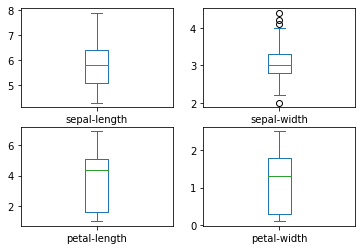

In [7]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

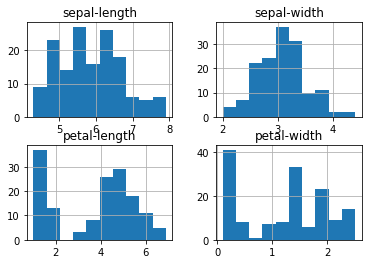

In [8]:
# histograms
dataset.hist()
pyplot.show()

Parece que talvez duas das variáveis de entrada tenham uma distribuição gaussiana. Isso é útil
observar como podemos usar algoritmos que podem explorar essa suposição.

##### Gráficos Multivariados

Agora podemos olhar para as interações entre as variáveis. Vejamos os gráficos de dispersão de todos
pares de atributos. Isso pode ser útil para identificar relacionamentos estruturados entre variáveis de entrada.

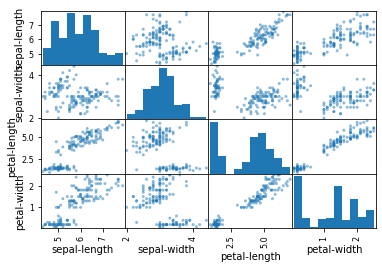

In [9]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

Observe o agrupamento diagonal de alguns pares de atributos. Isso sugere uma alta correlação e
uma relação previsível.

#### Avalie alguns algoritmos

Agora é hora de criar alguns modelos dos dados e estimar sua precisão em dados não vistos.
Aqui está o que vamos cobrir nesta etapa:

1. Separe um conjunto de dados de validação.
2. Configure o equipamento de teste para usar a validação cruzada de 10 vezes.
3. Construa 5 modelos diferentes para prever espécies de
medições superiores
4. Selecione o melhor modelo.

##### Criar um conjunto de dados de validação

Precisamos saber se o modelo que criamos é bom ou não. Mais tarde, usaremos
métodos estatísticos para estimar a precisão dos modelos que criamos em dados não vistos.
Também queremos uma estimativa mais concreta da precisão do melhor modelo em dados não vistos por
avaliando-o em dados reais não vistos. Ou seja, vamos reter alguns dados que o
algoritmos não conseguirão ver e usaremos esses dados para obter uma segunda e independente ideia de quão preciso o melhor modelo pode realmente ser. Vamos dividir o conjunto de dados carregado em dois, 80%
dos quais usaremos para treinar nossos modelos e 20% que reteremos como um conjunto de dados de validação.

In [10]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

Agora você tem dados de treinamento no treino_X e no treino_Y para preparar modelos e um
Validação_X e conjuntos de validação_Y que podemos usar mais tarde.

##### Equipamento de teste

Usaremos validação cruzada de 10 vezes para estimar a precisão. Isso dividirá nosso conjunto de dados em 10
partes, treine em 9 e teste em 1 e repita para todas as combinações de divisões de teste de trem. Nós estamos usando a métrica de precisão para avaliar modelos. Esta é uma razão entre o número de previsões corretas
instâncias dividido pelo número total de instâncias no conjunto de dados multiplicado por 100 para fornecer um
porcentagem (por exemplo, 95% de precisão). Estaremos usando a variável de pontuação quando executarmos build e
avalie cada modelo a seguir.

##### Construir modelos

Não sabemos quais algoritmos seriam bons para esse problema ou quais configurações usar.
A partir dos gráficos, temos uma ideia de que algumas das classes são parcialmente separáveis linearmente em algumas
dimensões, então esperamos resultados geralmente bons. Vamos avaliar seis algoritmos diferentes:

. Regressão Logística (LR).

. Análise Discriminante Linear (LDA).

. k-vizinhos mais próximos (KNN).

. Árvores de classificação e regressão (CART).

. Gaussian Naive Bayes (NB).

. Support Vector Machines (SVM).

Esta lista é uma boa mistura de linear simples (LR e LDA), não linear (KNN, CART, NB
e SVM). Redefinimos a semente do número aleatório antes de cada execução para garantir que o
avaliação de cada algoritmo é realizada usando exatamente as mesmas divisões de dados. Ele garante o
os resultados são diretamente comparáveis. Vamos construir e avaliar nossos cinco modelos:

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


##### Selecione o melhor modelo

Agora temos 6 modelos e estimativas de precisão para cada um. Precisamos comparar os modelos para
uns aos outros e selecione o mais preciso. Executando o exemplo acima, obtemos o seguinte raw
resultados:

In [ ]:
### REsul

Agora temos 6 modelos e estimativas de precisão para cada um. Precisamos comparar os modelos para
uns aos outros e selecione o mais preciso. Executando o exemplo acima, obtemos o seguinte raw
resultados: Podemos ver que parece que KNN tem a maior pontuação de precisão estimada. Nós também podemos
crie um gráfico dos resultados da avaliação do modelo e compare a dispersão e a precisão média
de cada modelo. Existe uma população de medidas de precisão para cada algoritmo porque cada
algoritmo foi avaliado 10 vezes (validação cruzada de 10 vezes).

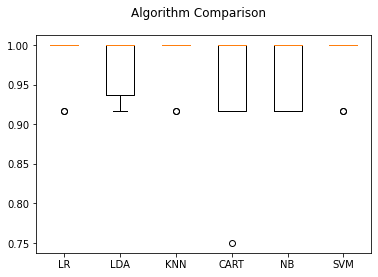

In [15]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Você pode ver que os gráficos de caixa e bigode são compactados no topo do intervalo, com muitos
amostras alcançando 100% de precisão.

#### Fazer previsões

O algoritmo KNN foi o modelo mais preciso que testamos. Agora queremos ter uma ideia
da precisão do modelo em nosso conjunto de dados de validação. Isso nos dará um nal independente
verificar a precisão do melhor modelo. É importante manter um conjunto de validação para o caso
você cometeu um deslize durante o treinamento, como uma sobreposição ao conjunto de treinamento ou um vazamento de dados. Ambos
resultará em um resultado excessivamente otimista. Podemos executar o modelo KNN diretamente na validação
defina e resuma os resultados como uma pontuação final de precisão, uma matriz de confusão e uma classificação
relatório.

In [16]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       0.85      0.92      0.88        12
   Virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



Podemos ver que a precisão é de 0,9 ou 90%. A matriz de confusão fornece uma indicação de
os três erros cometidos. Finalmente, o relatório de classificação fornece uma divisão de cada classe por precisão, recall, pontuação f1 e suporte mostrando excelentes resultados (concedido o conjunto de dados de validação
Era pequeno).

In [17]:
%reload_ext watermark
%watermark -gu "caiquemiranda" -iv

Github username: caiquemiranda

matplotlib: 3.5.2



### End.